In [60]:
import sys

sys.path.append('/mnt/sdceph/users/nroy/radmc3d-2.0/python/radmc3dPy')
sys.path.append('/mnt/home/nroy/test/chimes-IGNIS/chimes-driver/ext-lib/pfh_python')

from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.facecolor']='w'
;

''

In [94]:
''' READ IN FOR SPECIFIC LINE & GALAXY '''

'''
# m12i CO
faceon = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/CO_J10/"
edgeon = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/CO_J10/"
line = "CO_J10"
intensity_mask = -7
'''

'''
# m12i CII
faceon = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/CII_158mu/"
edgeon = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/CII_158mu/"
line = "CII_158mu"
intensity_mask = -6
'''



'''
# m12i NII
faceon = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/NII_6585A/"
edgeon = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/NII_6585A/"
line = "NII_6585A"
intensity_mask = -12 #may differ with inclination?
'''

'''
# m12i Halpha
faceon = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/Halpha/HI/"
edgeon = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/Halpha/HI/"
faceon_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/Halpha/HII/"
edgeon_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/Halpha/HII/"
line = "Halpha"
intensity_mask = -6
'''

'''
# m12i OIII
faceon = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/0deg/OIII_5007A/"
edgeon = "/home/jovyan/radmc3d_data/subtract_com_velocity/m12i/60kpc/no-continuum-sources/rotations/90deg/OIII_5007A/"
line = "OIII_5007A"
intensity_mask = -5
'''

'''
# A4 CO
faceon = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/CO_J10/"
edgeon = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/CO_J10/"
line = "CO_J10"
intensity_mask = -2
'''

'''
# A4 CII
faceon = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/CII_158mu/"
edgeon = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/CII_158mu/"
line = "CII_158mu"
intensity_mask = -2
'''

'''
# A4 NII
faceon = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/NII_6548A/"
edgeon = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/NII_6548A/"
line = "NII_6548A"
intensity_mask = -2
'''

'''
# A4 Halpha
faceon = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/Halpha/HI/"
edgeon = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/Halpha/HI/"
faceon_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/Halpha/HII/"
edgeon_2 = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/Halpha/HII/"
line = "Halpha"
intensity_mask = -1
'''

'''
# A4 OIII
faceon = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/0deg/OIII_5007A/"
edgeon = "/home/jovyan/radmc3d_data/subtract_com_velocity/A4_33000_snum151/base_resolution_128/no-continuum-sources/rotations/90deg/OIII_5007A/"
line = "OIII_5007A"
intensity_mask = -3
'''



;

''

In [95]:
''' MOMENT 1 FROM EDGE ON '''
filepath_tot = edgeon + 'image_tot.hdf5'
filepath_con = edgeon + 'image_continuum.hdf5'
file_con = h5.File(filepath_con,'r')
file_tot = h5.File(filepath_tot,'r')

npix_x = np.shape(file_tot['image_array'][:])[0]
npix_y = np.shape(file_tot['image_array'][:])[1]

image_array = file_tot['image_array'][:] - file_con['image_array'][:]

image_array[image_array < 0] = 0

frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)


# Uncomment For Halpha

filepath_tot_2 = edgeon_2 + 'image_tot.hdf5'
filepath_con_2 = edgeon_2 + 'image_continuum.hdf5'
file_con_2 = h5.File(filepath_con,'r')
file_tot_2 = h5.File(filepath_tot,'r')

npix_x_2 = np.shape(file_tot_2['image_array'][:])[0]
npix_y_2 = np.shape(file_tot_2['image_array'][:])[1]

image_array_2 = file_tot_2['image_array'][:] - file_con_2['image_array'][:]

image_array_2[image_array_2 < 0] = 0

frequency_array_2 = 3e8 / (file_tot_2['lambda_array'][:] * 1e-6)

image_array = image_array + image_array_2



#moment 0
integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

integrated_image_array_moment0[0,0] = 0 #final moment 0 array
moment_0_edge = np.asarray(integrated_image_array_moment0) 

'''
# Uncomment for low-intensity mask

for i in range(len(moment_0_edge)):
    for j in range(len(moment_0_edge[i])):
        if np.log10(moment_0_edge[i][j]/np.max(moment_0_edge)) < intensity_mask:
            moment_0_edge[i][j] = 0
'''


#moment 1
lambda_0_dict = {"CII_158mu": 157.62730407714844,
     "Halpha": 0.65600490570068359,
     "NII_6585A": 0.65807253122329712,
     "NII_6548A": 0.6545339822769165,
     "OIII_5007A": 0.50047838687896729,
     "CO_J10": 2600.757634}

lambda_0 = lambda_0_dict[line]
lambda_array = np.array(file_con['lambda_array'])
velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 


moment1_noint = velocity_arr * image_array

integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
isolate_moment_1[0,0] = 0 #final moment 1 array
moment_1_edge = np.asarray(isolate_moment_1) 

'''
# Uncomment for low-intensity mask

for i in range(len(moment_0_edge)):
    for j in range(len(moment_0_edge[i])):
        if np.log10(moment_0_edge[i][j]/np.max(moment_0_edge)) < intensity_mask:
            moment_1_edge[i][j] = 0
'''

;

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: divide by zero encountered in true_divide


''

In [96]:
''' MOMENT 2 FROM FACE ON '''
filepath_tot = faceon + 'image_tot.hdf5'
filepath_con = faceon + 'image_continuum.hdf5'
file_con = h5.File(filepath_con,'r')
file_tot = h5.File(filepath_tot,'r')

npix_x = np.shape(file_tot['image_array'][:])[0]
npix_y = np.shape(file_tot['image_array'][:])[1]

image_array = file_tot['image_array'][:] - file_con['image_array'][:]

image_array[image_array < 0] = 0

frequency_array = 3e8 / (file_tot['lambda_array'][:] * 1e-6)


# Uncomment For Halpha

filepath_tot_2 = faceon_2 + 'image_tot.hdf5'
filepath_con_2 = faceon_2 + 'image_continuum.hdf5'
file_con_2 = h5.File(filepath_con,'r')
file_tot_2 = h5.File(filepath_tot,'r')

npix_x_2 = np.shape(file_tot_2['image_array'][:])[0]
npix_y_2 = np.shape(file_tot_2['image_array'][:])[1]

image_array_2 = file_tot_2['image_array'][:] - file_con_2['image_array'][:]

image_array_2[image_array_2 < 0] = 0

frequency_array_2 = 3e8 / (file_tot_2['lambda_array'][:] * 1e-6)

image_array = image_array + image_array_2



#moment 0
integrated_image_array_moment0 = np.zeros((npix_x, npix_y))
delta_nu = np.abs(frequency_array[1:] - frequency_array[:-1])
for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment0[i, j] = np.sum(delta_nu * (image_array[i, j, :-1] + image_array[i, j, 1:]) / 2.0)

integrated_image_array_moment0[0,0] = 0 #final moment 0 array
moment_0_face = np.asarray(integrated_image_array_moment0) 

'''
# Uncomment for low-intensity mask

for i in range(len(moment_0_face)):
    for j in range(len(moment_0_face[i])):
        if np.log10(moment_0_face[i][j]/np.max(moment_0_face)) < intensity_mask:
            moment_0_face[i][j] = 0
'''


#moment 1
lambda_0_dict = {"CII_158mu": 157.62730407714844,
     "Halpha": 0.65600490570068359, 
     "NII_6585A": 0.65807253122329712,
     "NII_6548A": 0.6545339822769165,
     "OIII_5007A": 0.50047838687896729,
     "CO_J10": 2600.757634}

lambda_0 = lambda_0_dict[line]
lambda_array = np.array(file_con['lambda_array'])
velocity_arr = (lambda_array - lambda_0) * 3e5 / lambda_array 

moment1_noint = velocity_arr * image_array

integrated_image_array_moment1 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment1[i, j] = np.sum(delta_nu * (moment1_noint[i, j, :-1] + moment1_noint[i, j, 1:]) / 2.0)

isolate_moment_1 = integrated_image_array_moment1 / integrated_image_array_moment0
isolate_moment_1[0,0] = 0 #final moment 1 array

moment_1_face = np.asarray(isolate_moment_1) 
'''
# Uncomment for low-intensity mask

for i in range(len(moment_0_face)):
   for j in range(len(moment_0_face[i])):
       if np.log10(moment_0_face[i][j]/np.max(moment_0_face)) < intensity_mask:
           moment_1_face[i][j] = 0
'''


#moment 2
isolate_moment_1_3D = np.empty([len(image_array), len(image_array), len(velocity_arr)])

for i in range(len(velocity_arr)):
    for j in range(len(image_array)):
        for k in range(len(image_array)):
            isolate_moment_1_3D[j][k][i] = isolate_moment_1[j][k]

moment2_noint = image_array * ((velocity_arr - isolate_moment_1_3D) * (velocity_arr - isolate_moment_1_3D))

integrated_image_array_moment2 = np.zeros((npix_x, npix_y))

for i in range(npix_x):
    for j in range(npix_y):
        integrated_image_array_moment2[i, j] = np.sum(delta_nu * (moment2_noint[i, j, :-1] + moment2_noint[i, j, 1:]) / 2.0)

integrated_image_array_moment2[0,0] = 0

isolate_moment_2 = integrated_image_array_moment2 / integrated_image_array_moment0
isolate_moment_2[0,0] = 0

isolate_moment_2 = np.sqrt(isolate_moment_2) #final moment 2 array
moment_2_face = np.asarray(isolate_moment_2) 

'''
# Uncomment for low-intensity mask

for i in range(len(moment_0_face)):
    for j in range(len(moment_0_face[i])):
        if np.log10(moment_0_face[i][j]/np.max(moment_0_face)) < intensity_mask:
            moment_2_face[i][j] = 0
'''

;

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in true_divide
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in true_divide


''

In [97]:
''' CALC V/SIGMA '''
numerator = moment_0_edge * ((moment_1_edge)*(moment_1_edge))
denominator = moment_0_face * ((moment_2_face)*(moment_2_face))

#NaN Catcher
if np.isnan(np.sum(numerator)):
    numerator[np.where(np.isnan(numerator))] = 0
if np.isnan(np.sum(denominator)):
    denominator[np.where(np.isnan(denominator))] = 0

v_sigma_sq = (np.sum(numerator))/(np.sum(denominator))
v_sigma = np.sqrt(v_sigma_sq)

v_sigma

6.00163371903611

In [98]:
''' PLACE OUTPUT HERE '''

# Without intensity mask
CO_intrinsic_vsigma_m12i = 8.101
CII_intrinsic_vsigma_m12i = 8.112
NII_intrinsic_vsigma_m12i = 1.039
Halpha_intrinsic_vsigma_m12i = 3.943
OIII_intrinsic_vsigma_m12i = 2.418

CO_intrinsic_vsigma_A4 = 2.306
CII_intrinsic_vsigma_A4 = 1.786
NII_intrinsic_vsigma_A4 = 3.290
Halpha_intrinsic_vsigma_A4 = 6.002
OIII_intrinsic_vsigma_A4 = 2.102

'''
# With intensity masks
CO_intrinsic_vsigma_m12i = 8.101
CII_intrinsic_vsigma_m12i = 8.112
NII_intrinsic_vsigma_m12i = 1.039
Halpha_intrinsic_vsigma_m12i = 3.957
OIII_intrinsic_vsigma_m12i = 2.416

CO_intrinsic_vsigma_A4 = 2.299
CII_intrinsic_vsigma_A4 = 1.749
NII_intrinsic_vsigma_A4 = 5.745
Halpha_intrinsic_vsigma_A4 = 6.744
OIII_intrinsic_vsigma_A4 = 2.104
'''



'\n# With intensity masks\nCO_intrinsic_vsigma_m12i = 8.101\nCII_intrinsic_vsigma_m12i = 8.112\nNII_intrinsic_vsigma_m12i = 1.039\nHalpha_intrinsic_vsigma_m12i = 3.957\nOIII_intrinsic_vsigma_m12i = 2.416\n\nCO_intrinsic_vsigma_A4 = 2.299\nCII_intrinsic_vsigma_A4 = 1.749\nNII_intrinsic_vsigma_A4 = 5.745\nHalpha_intrinsic_vsigma_A4 = 6.744\nOIII_intrinsic_vsigma_A4 = 2.104\n'

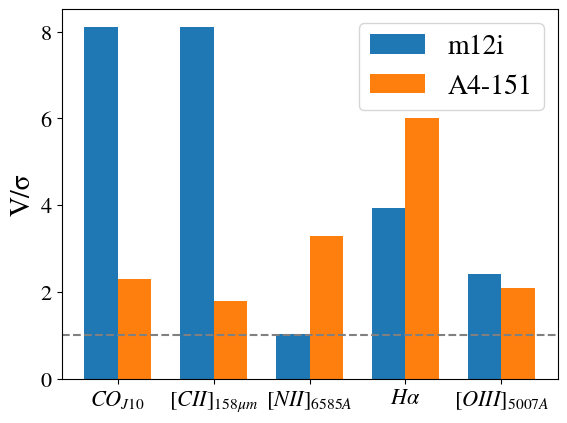

In [99]:
categories = [r'$CO_{J10}$', r'$[CII]_{158{\mu}m}$', r'$[NII]_{6585A}$', r'$H \alpha$', r'$[OIII]_{5007A}$']
valuesm12i = [CO_intrinsic_vsigma_m12i, CII_intrinsic_vsigma_m12i, NII_intrinsic_vsigma_m12i, Halpha_intrinsic_vsigma_m12i, OIII_intrinsic_vsigma_m12i]
valuesA4 = [CO_intrinsic_vsigma_A4, CII_intrinsic_vsigma_A4, NII_intrinsic_vsigma_A4, Halpha_intrinsic_vsigma_A4, OIII_intrinsic_vsigma_A4]

x = np.arange(len(categories))

width = 0.35

fig, ax = plt.subplots()

bars1 = ax.bar(x - width/2, valuesm12i, width, label='m12i')
bars2 = ax.bar(x + width/2, valuesA4, width, label='A4-151')

ax.set_xlabel('')
ax.set_ylabel('V/σ', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize = 16)
ax.tick_params(axis='y', labelsize=16)


ax.axhline(y=1, color='gray', linestyle='--')
ax.legend(fontsize = 20)


plt.savefig('intrinsic_vsigma_nomask.pdf', bbox_inches='tight', pad_inches = 0)
plt.show()
